In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.2 Speed-up and Parallel Efficiency

## 2.2.1 Benchmark set

In [ ]:
# read results of experiment 2.2/1
results_2_2_1 = pd.read_csv('./julia_set/logs/output_exp22_1_4962094.dat', sep=';', header=None)
results_2_2_1.columns = ['size', 'patch size', 'processors', 'runtime']

In [ ]:
# calculate average runtime for each combination of input size and number of processors
results_2_2_1 = results_2_2_1.groupby(['size', 'processors']).mean().reset_index()
results_2_2_1 = results_2_2_1.rename(columns={"runtime": "mean runtime (s)"})

In [ ]:
# add runtime with 1 processor 
p1_runtimes = results_2_2_1[results_2_2_1['processors'] == 1][['size', 'mean runtime (s)']].rename(columns={'mean runtime (s)': 'p1_runtime'})
results_2_2_1 = results_2_2_1.merge(p1_runtimes, on='size')

# calculate relative speed-up
results_2_2_1['relative speed-up'] = results_2_2_1['p1_runtime'] / results_2_2_1['mean runtime (s)']

# calculate parallel efficiency
results_2_2_1['parallel efficiency'] = results_2_2_1['relative speed-up'] / results_2_2_1['processors']

In [ ]:
# produce table for report
report_table = results_2_2_1[['size', 'processors', 'mean runtime (s)', 'relative speed-up', 'parallel efficiency']]
report_table = report_table.rename(columns={'size': 'input size', 'processors': 'number of processors'})
report_table

,input size,number of processors,mean runtime (s),relative speed-up,parallel efficiency
0,165,1,0.315333,1.000000,1.000000
1,165,2,0.166116,1.898269,0.949134
2,165,4,0.096102,3.281239,0.820310
3,165,8,0.071692,4.398427,0.549803
4,165,16,0.068969,4.572125,0.285758
5,165,24,0.080536,3.915411,0.163142
6,165,32,0.092323,3.415539,0.106736
7,1020,1,11.607458,1.000000,1.000000
8,1020,2,5.866052,1.978751,0.989376
9,1020,4,2.917574,3.978462,0.994615


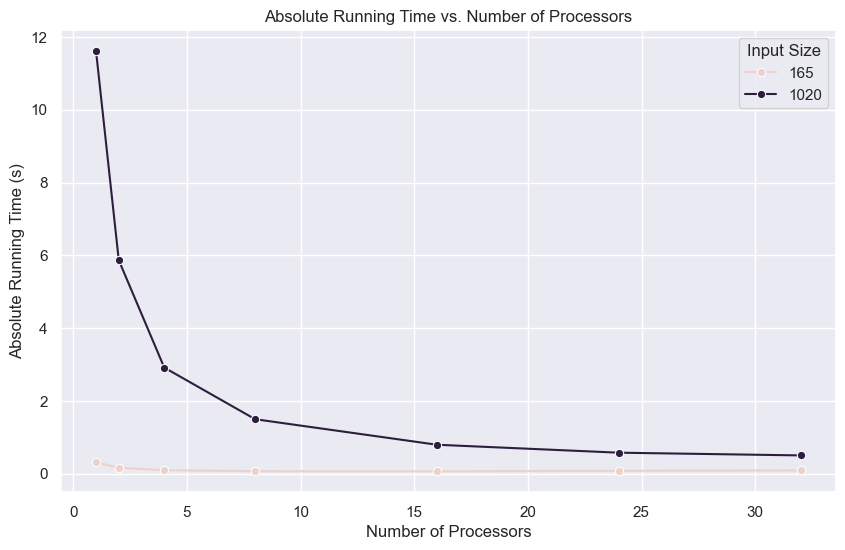

In [ ]:
# plot 1: running time vs. number of processors
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_1, x='processors', y='mean runtime (s)', hue='size', marker='o')
plt.title('Absolute Running Time vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Absolute Running Time (s)')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

We can see that the average runtime of the algorithm decreases as the number of processors increases for each input size. This demonstrates that parallel computing indeed reduces runtime by using higher parallelism. Nonetheless, the rate of decrease also seems to get smaller as the number of processors, indicating that the amount of parallelism is limited for the given task.

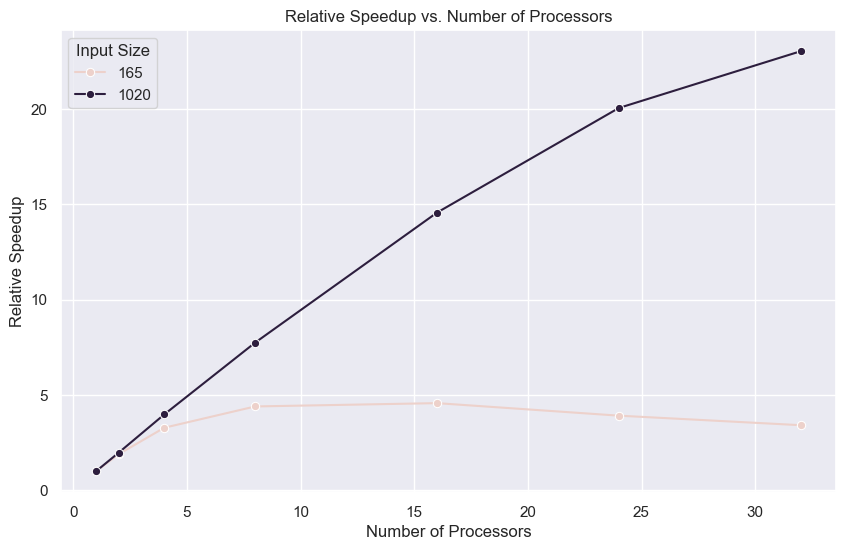

In [ ]:
# plot 2: relative speed-up vs number of processors
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_1, x='processors', y='relative speed-up', hue='size', marker='o')
plt.title('Relative Speedup vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Relative Speedup')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

The relative speedup vs. number of cores plot clearly illustrates how the relative speedup of the algorithm increases as the number of processors grows for each input size. We can also see that the speedup is higher for the larger input size as it benefits more from the parallelism. However, we can again see that the amount of parallelism we can use is limited due to the amount of workload.

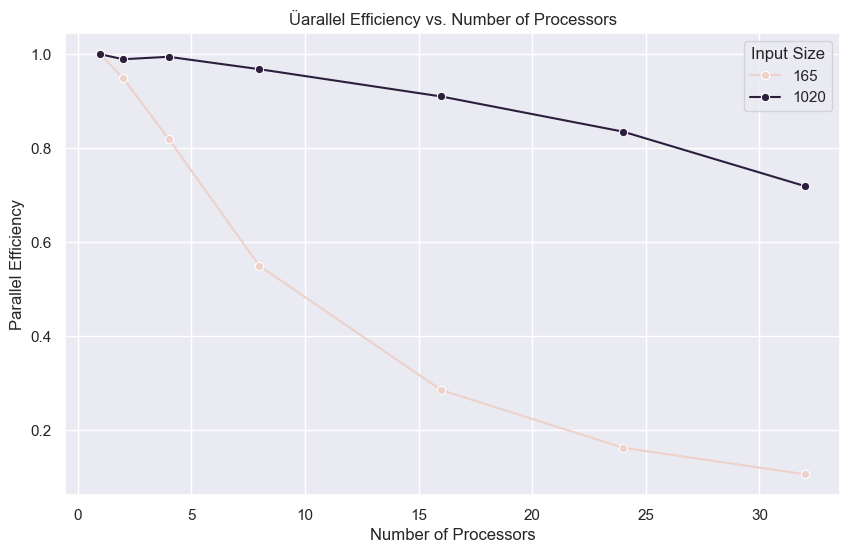

In [ ]:
# plot 3: parallel efficiency vs number of processors
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_1, x='processors', y='parallel efficiency', hue='size', marker='o')
plt.title('Üarallel Efficiency vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Parallel Efficiency')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

The "Parallel Efficiency vs. Number of Processors" plot shows how the parallel efficiency decreases as the number of processors increases for each input size. This is exactly what we expect due to the requirement of managing more processors while having fewer workload for each of those processors. We can also see that higher input sizes seem to maintain higher parallel efficiency compared to the smaller input.

## 2.2.2 Student Set

In [15]:
# read results of experiment 2.2/2
results_2_2_2 = pd.read_csv('./julia_set/logs/output_exp22_2_4962105.dat', sep=';', header=None)
results_2_2_2.columns = ['size', 'patch_size', 'processors', 'runtime']

In [16]:
# calculate average runtime for each combination of input size and number of processors (then rename runtime to avg runtime)
results_2_2_2 = results_2_2_2.groupby(['size', 'processors']).mean().reset_index()
results_2_2_2 = results_2_2_2.rename(columns={"runtime": "mean runtime (s)"})

In [17]:
# add sequential runtime and runtime with 1 processor 
p1_runtimes = results_2_2_2[results_2_2_2['processors'] == 1][['size', 'mean runtime (s)']].rename(columns={'mean runtime (s)': 'p1_runtime'})
results_2_2_2 = results_2_2_2.merge(p1_runtimes, on='size')

# calculate relative speed-up
results_2_2_2['relative speed-up'] = results_2_2_2['p1_runtime'] / results_2_2_2['mean runtime (s)']

# calculate parallel efficiency
results_2_2_2['parallel efficiency'] = results_2_2_2['relative speed-up'] / results_2_2_2['processors']

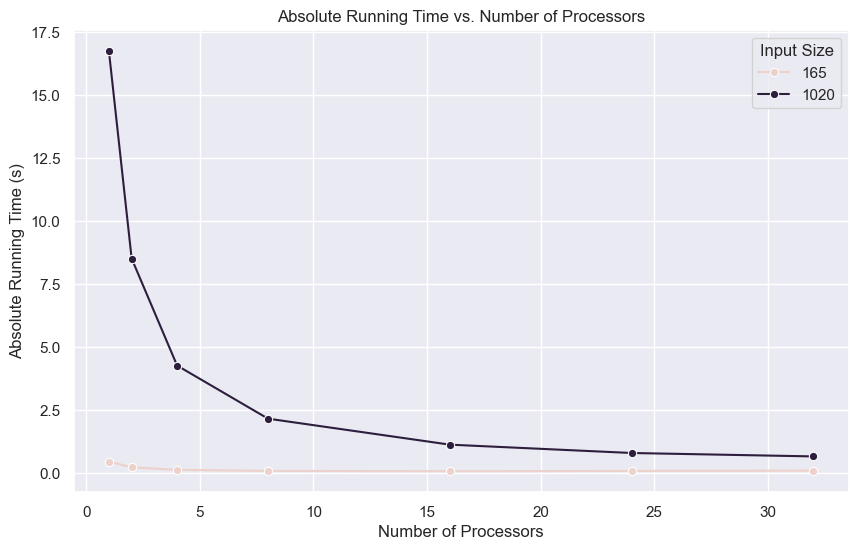

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_2, x='processors', y='mean runtime (s)', hue='size', marker='o')
plt.title('Absolute Running Time vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Absolute Running Time (s)')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

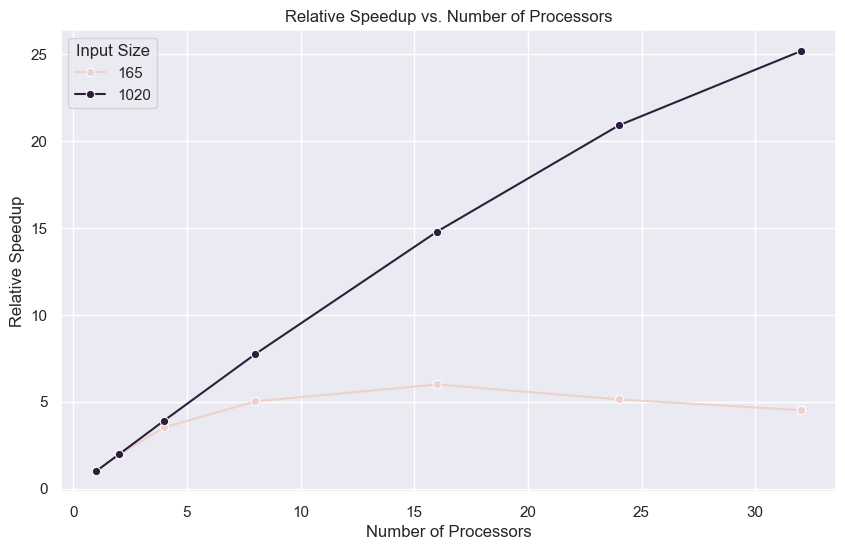

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_2, x='processors', y='relative speed-up', hue='size', marker='o')
plt.title('Relative Speedup vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Relative Speedup')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

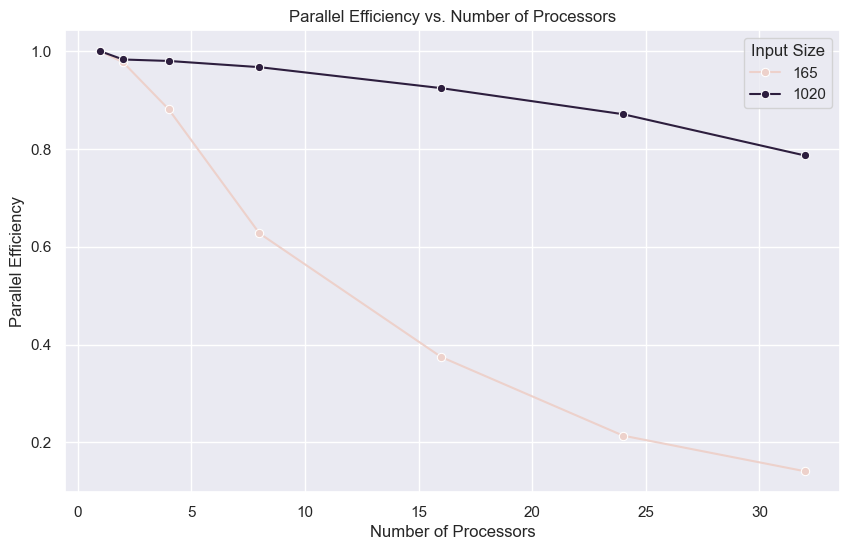

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_2_2, x='processors', y='parallel efficiency', hue='size', marker='o')
plt.title('Parallel Efficiency vs. Number of Processors')
plt.xlabel('Number of Processors')
plt.ylabel('Parallel Efficiency')
plt.legend(title='Input Size')
plt.grid(True)
plt.show()

In general, we can see very similar trends in both the student and the benchmark set. In both cases, the various plots are showing trends that we were already expecting from our theoretical knowledge, namely that parallelism can enhance the runtime of an algorithm. Howevery, one has to be careful, since using too much parallelism can again lead of inefficient usage of resources. This can be seen in the plots of the parallel efficiency, which decreases as the number of processors increases. (Maybe the student set is a little bit more robust with smaller inputs than the benchmark set)

# 2.3 Influence of Patch Size

In [23]:
# read results of experiment 2.3
results_2_3= pd.read_csv('./julia_set/logs/output_exp23_4962099.dat', sep=';', header=None)
results_2_3.columns = ['size', 'patch size', 'processors', 'runtime']

In [24]:
# calculate average runtime for each patch size
results_2_3 = results_2_3.groupby(['patch size']).mean().reset_index()
results_2_3 = results_2_3.rename(columns={"runtime": "mean runtime (s)"})

In [25]:
report_table_2_3 = results_2_3[['size', 'processors', 'patch size', 'mean runtime (s)']]
report_table_2_3 = report_table_2_3.rename(columns={'size': 'input size', 'processors': 'number of processors'})
report_table_2_3

,input size,number of processors,patch size,mean runtime (s)
0,1000.0,32.0,1,66.907235
1,1000.0,32.0,5,2.774785
2,1000.0,32.0,10,0.873669
3,1000.0,32.0,20,0.669290
4,1000.0,32.0,55,0.705285
5,1000.0,32.0,150,1.710613
6,1000.0,32.0,400,6.538033


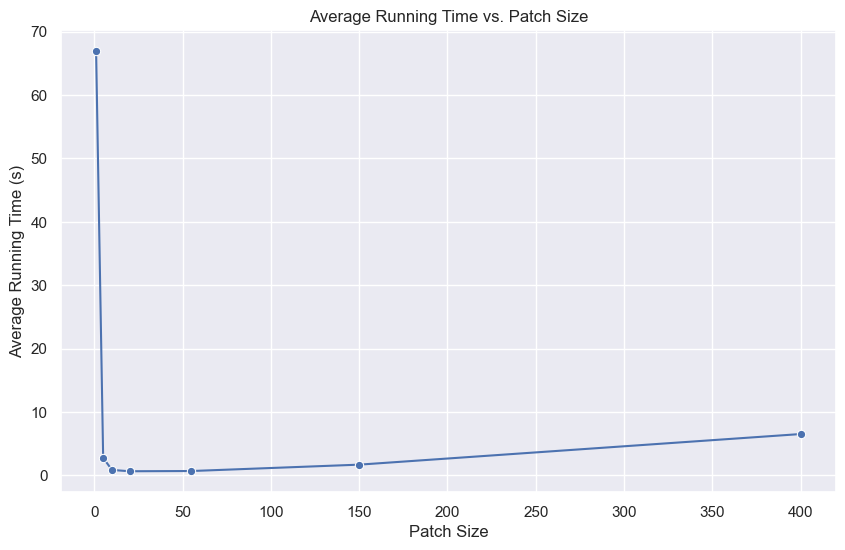

In [26]:
# average runtime vs. patch size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_3, x='patch size', y='mean runtime (s)', marker='o')
plt.title('Average Running Time vs. Patch Size')
plt.xlabel('Patch Size')
plt.ylabel('Average Running Time (s)')
plt.grid(True)
plt.show()

The "Average Runtime vs. Patch Size" plot shows how the average runtime of the algorithm changes with increasing patch sizes. We can see that very small patch sizes (1 in our case) leads to large runtimes since the algorithm has to manage more patches in total. As the patch size increases, the runtime decreases since we have to manage fewer patches and the parallelism gets more efficient. However, beyond a certain point of patch size, the parallelism might get less efficient, as the large size of the patches lead to very few patches and the workload for the processors cannot be distributed efficiently.

# 2.4 Finding the Best Patch Size

In [27]:
# read results of experiment 2.4
results_2_4= pd.read_csv('./julia_set/logs/output_exp24_4962101.dat', sep=';', header=None)
results_2_4.columns = ['size', 'patch size', 'processors', 'runtime']

In [28]:
# calculate average runtime for each patch size
results_2_4 = results_2_4.groupby(['patch size']).mean().reset_index()
results_2_4 = results_2_4.rename(columns={"runtime": "mean runtime (s)"})

In [31]:
report_table_2_4 = results_2_4[['size', 'processors', 'patch size', 'mean runtime (s)']]
report_table_2_4 = report_table_2_4.rename(columns={'size': 'input size', 'processors': 'number of processors'})
report_table_2_4

,input size,number of processors,patch size,mean runtime (s)
0,850.0,24.0,1,45.976855
1,850.0,24.0,2,11.733129
2,850.0,24.0,3,5.406438
3,850.0,24.0,4,3.054026
4,850.0,24.0,5,2.007332
5,850.0,24.0,6,1.386115
6,850.0,24.0,7,1.045214
7,850.0,24.0,8,0.859720
8,850.0,24.0,9,0.751970
9,850.0,24.0,10,0.687494


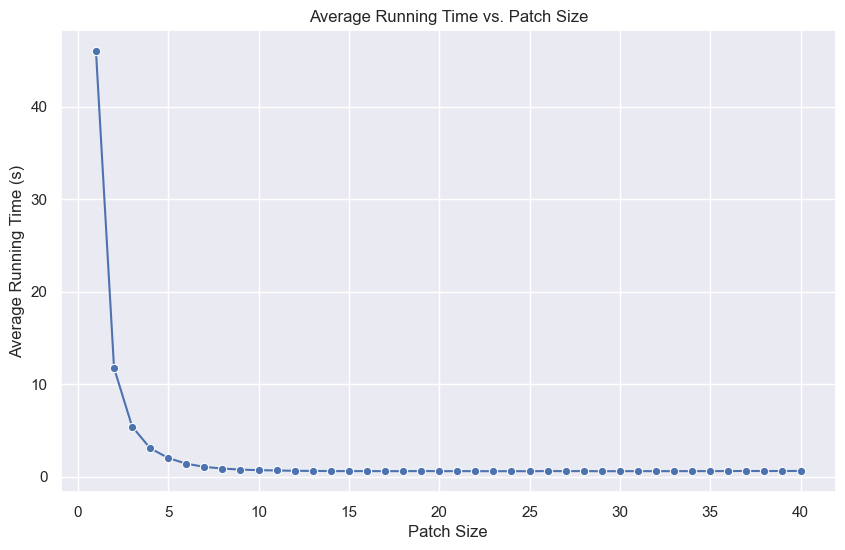

In [29]:
# average runtime vs. patch size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_4, x='patch size', y='mean runtime (s)', marker='o')
plt.title('Average Running Time vs. Patch Size')
plt.xlabel('Patch Size')
plt.ylabel('Average Running Time (s)')
plt.grid(True)
plt.show()

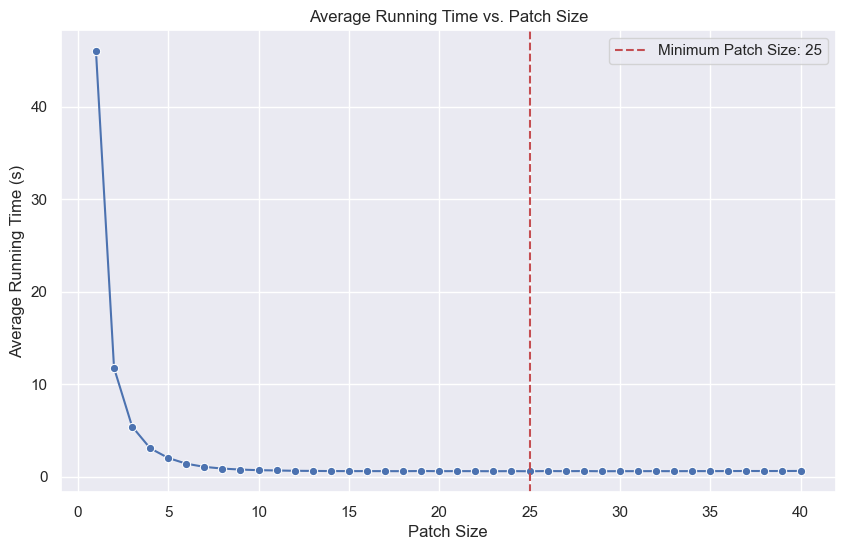

In [30]:
# average runtime vs. patch size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_2_4, x='patch size', y='mean runtime (s)', marker='o')
plt.title('Average Running Time vs. Patch Size')
plt.xlabel('Patch Size')
plt.ylabel('Average Running Time (s)')
plt.grid(True)
min_patch_size = results_2_4.loc[results_2_4['mean runtime (s)'].idxmin(), 'patch size']
plt.axvline(x=min_patch_size, color='r', linestyle='--', label=f'Minimum Patch Size: {min_patch_size}')
plt.legend()
plt.show()